In [86]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# 회귀분석
from statsmodels.formula.api import ols
# 회귀분석 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 
import statsmodels.formula.api as smf
# 평가함수
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# data split
from sklearn.model_selection import train_test_split
# 선형 회귀 모형
from sklearn.linear_model import LinearRegression
# 규제화 패키지
from sklearn.linear_model import Ridge, Lasso, ElasticNet
# 변수 선택법
from sklearn.feature_selection import RFE
# Scale 변환
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 한글 폰트 설정
# !ls -l /usr/share/fonts/truetype/
!rm -rf ~/.cache/matplotlib/*
!fc-cache -fv

import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

/usr/share/fonts: caching, new cache contents: 0 fonts, 6 dirs
/usr/share/fonts/X11: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/X11/Type1: caching, new cache contents: 8 fonts, 0 dirs
/usr/share/fonts/X11/encodings: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/X11/encodings/large: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/X11/misc: caching, new cache contents: 89 fonts, 0 dirs
/usr/share/fonts/X11/util: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cMap: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/cmap/adobe-cns1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-gb1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan2: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-korea1: c

fc-cache: succeeded


['NanumGothic Eco',
 'NanumGothic',
 'NanumGothic Eco',
 'NanumSquare',
 'NanumSquare',
 'NanumSquareRound',
 'Nanum Brush Script',
 'NanumMyeongjo Eco',
 'NanumMyeongjo Eco',
 'NanumBarunGothic',
 'NanumBarunpen',
 'NanumBarunpen',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumGothic',
 'NanumGothic Eco',
 'NanumSquare',
 'NanumSquareRound',
 'NanumGothic',
 'NanumGothicCoding',
 'NanumBarunGothic',
 'NanumSquareRound',
 'NanumSquare',
 'NanumMyeongjo',
 'NanumMyeongjo Eco',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'Nanum Pen Script',
 'NanumGothicCoding',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumMyeongjo Eco',
 'NanumGothicCoding',
 'NanumBarunpen',
 'NanumBarunpen',
 'NanumBarunGothic',
 'NanumMyeongjo',
 'NanumGothic',
 'NanumMyeongjo Eco',
 'NanumGothic Eco',
 'NanumGothic',
 'NanumGothic Eco',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumSquare',
 'Nanum Pen Script',
 'NanumSquareRound',
 'NanumGothicCoding',
 'NanumBar

In [3]:
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 전체 적용
plt.rcParams["font.family"] = 'NanumMyeongjo'

# 실습과제 1 : 다중 선형 회귀 분석

## 데이터 불러오기

In [7]:
df = pd.read_csv('/home/piai/Bigdata 실습과제/1 Big Data 분석 기초/체질검사.csv', encoding = 'euc-kr')
df.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


## 변수 간의 경향성 파악

### 산점도 분석

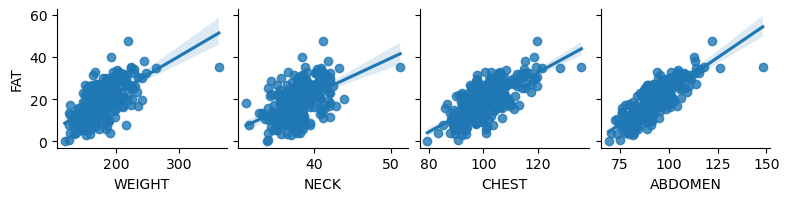

In [137]:
sns.pairplot(df, y_vars = 'FAT', x_vars=['WEIGHT', 'NECK', 'CHEST', 'ABDOMEN'], kind='reg', height = 2)

### 상관분석

In [11]:
df.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665


## 회귀 모델 생성

In [45]:
# data split
df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 1234)

# 선형 회귀 분석
reg_model = smf.ols(formula = "FAT ~ AGE + WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST", data = df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     41.45
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           9.76e-45
Time:                        15:02:56   Log-Likelihood:                -495.19
No. Observations:                 176   AIC:                             1018.
Df Residuals:                     162   BIC:                             1063.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.8408     20.905     -1.714      0.0

In [46]:
# 다중공정성 확인
df_train_x = df_train.drop('FAT', axis = 1)
df_train_x_const = add_constant(df_train_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])]

df_vif.sort_values("VIF", ascending = True).round(2)

,variable,VIF
3,HEIGHT,1.65
12,FOREARM,2.03
10,ANKLE,2.23
1,AGE,2.42
11,BICEPS,3.45
13,WRIST,3.50
4,NECK,4.25
9,KNEE,5.13
8,THIGH,8.96
5,CHEST,10.72


In [47]:
# VIF가 높은 변수 제거 
reg_model = smf.ols(formula = "FAT ~ AGE + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE + BICEPS + FOREARM + WRIST", data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     43.77
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           9.84e-45
Time:                        15:02:58   Log-Likelihood:                -497.32
No. Observations:                 176   AIC:                             1021.
Df Residuals:                     163   BIC:                             1062.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2082      8.590      0.257      0.7

In [51]:
# 다중공산성 재확인
df_train_x = df_train.drop(['FAT','WEIGHT'],axis = 1)
df_train_x_const = add_constant(df_train_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])]

df_vif.sort_values("VIF", ascending = True).round(2)

,variable,VIF
2,HEIGHT,1.36
11,FOREARM,2.03
9,ANKLE,2.10
1,AGE,2.33
10,BICEPS,3.37
12,WRIST,3.40
3,NECK,3.77
8,KNEE,4.64
4,CHEST,8.80
7,THIGH,8.94


In [53]:
# 유의한 설명 변수 확인
reg_model = smf.ols(formula = " FAT ~ HEIGHT + NECK + ABDOMEN + HIP + FOREARM",data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     102.3
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           2.18e-49
Time:                        15:04:40   Log-Likelihood:                -501.89
No. Observations:                 176   AIC:                             1016.
Df Residuals:                     170   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7817      7.302      0.381      0.7

In [59]:
# 다중공산성 재확인
df_train_x = df_train[['HEIGHT','NECK', 'ABDOMEN', 'HIP', 'FOREARM']]
df_train_x_const = add_constant(df_train_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])]

df_vif.sort_values("VIF", inplace = True)
df_vif.sort_values

<bound method DataFrame.sort_values of   variable         VIF
1   HEIGHT    1.136936
5  FOREARM    1.572802
2     NECK    2.867108
3  ABDOMEN    4.908046
4      HIP    4.946197
0    const  516.314216>

## 오차의 기본가정 검토

### 등분산성 검정

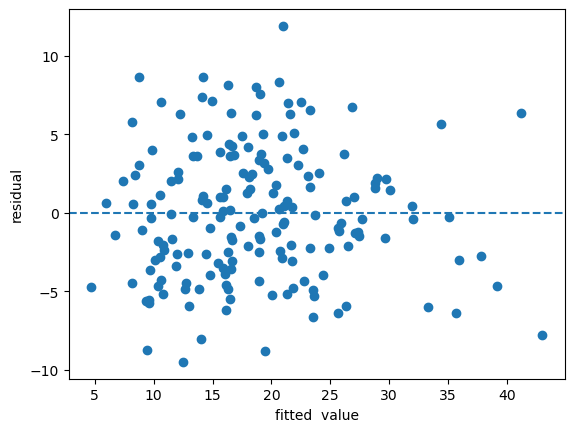

In [63]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted  value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = '--')

### 정규성 검정

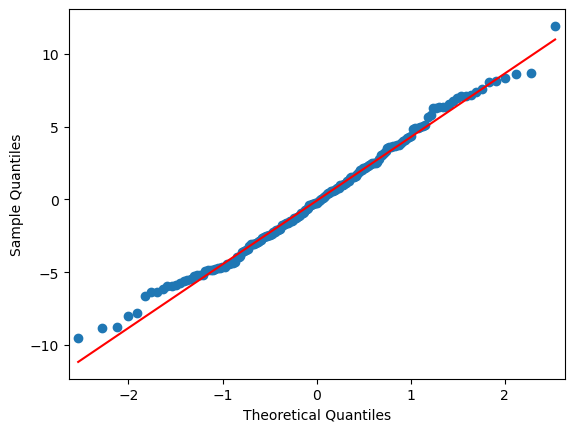

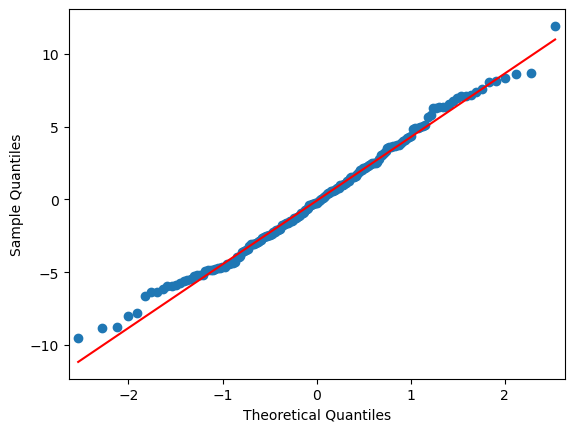

In [65]:
qqplot(reg_result.resid, line = "q")

### 독립성 검정

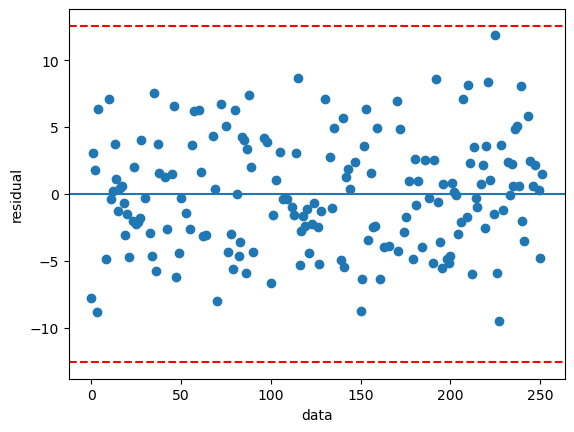

In [71]:
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel("data")
plt.ylabel('residual')
plt.axhline(y=0, linestyle='-', label='CL')
plt.axhline(y=3*np.std(reg_result.resid),linestyle='--', color = 'red', label='UCL')
plt.axhline(y=-3*np.std(reg_result.resid),linestyle='--', color = 'red', label='LCL')

## 결론 도출

### 최종회귀식

In [74]:
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print("train data의 결정계수: ", r2_score(df_train['FAT'], train_pred))
print("test data의 결정계수: ", r2_score(df_test['FAT'], test_pred))

train data의 결정계수:  0.7505481797941164
test data의 결정계수:  0.6575253938890124


## 후진제거법을 이용한 경우

In [128]:
# 목표변수 설명변수 분리
df_train_y = df_train['FAT']
df_train_y = df_train.drop('FAT', axis = 1)

# 선형회귀 모델
model = LinearRegression()
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_train_x, df_train_y)

# 선택된 변수
selected_cols = df_train_x.columns[rfe.support_]
# 제거된 변수
removed_cols = df_train_x.columns[~rfe.support_]

print("Selected Variables: {0}".format(selected_cols))
print("Removed Variables: {0}".format(removed_cols))

Selected Variables: Index(['NECK', 'HIP', 'KNEE', 'ANKLE', 'WRIST'], dtype='object')
Removed Variables: Index(['AGE', 'WEIGHT', 'HEIGHT', 'CHEST', 'ABDOMEN', 'THIGH', 'BICEPS',
       'FOREARM'],
      dtype='object')


In [133]:
# 회귀 모델 생성
rfe_reg_model = smf.ols(formula = "FAT ~NECK + ABDOMEN + ANKLE + FOREARM + WRIST", data = df_train)
# 적합
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary)

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7f9f7dbe9430>>


<AxesSubplot:>

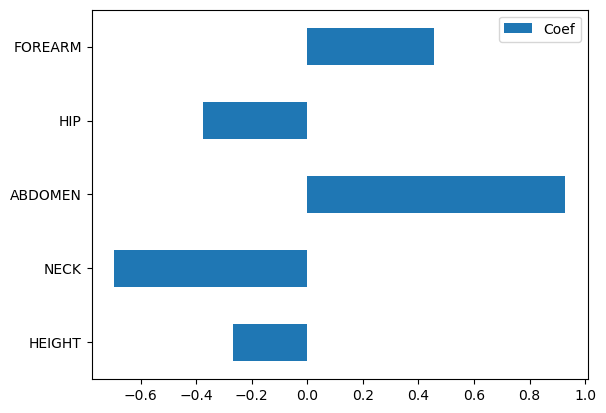

In [135]:
# 결론 도출
# 변수 중요도 확인
df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:]}, index = ['HEIGHT', 'NECK', "ABDOMEN", "HIP", "FOREARM"])
df_reg_coef.plot.barh(y = "Coef")

# 실습과제 2 : 다중선형 회귀분석(규제화)

In [109]:
df_raw = pd.read_csv('/home/piai/Bigdata 실습과제/1 Big Data 분석 기초/체질검사.csv', encoding = 'euc-kr')

In [115]:
# 목표변수, 설명변수 지정
df_raw_y = df_raw["FAT"]
df_raw_x = df_raw.drop("FAT", axis = 1, inplace = False)
# Data split
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
df_train_x

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
238,23,188.15,77.50,38.0,96.6,85.3,102.5,59.1,37.6,23.2,31.8,29.7,18.3
117,65,224.50,68.25,38.8,119.6,118.0,114.3,61.3,42.1,23.4,34.9,30.1,19.4
209,37,145.25,69.25,36.0,96.8,79.4,89.2,50.3,34.8,22.2,31.0,26.9,16.9
12,40,158.00,69.25,36.3,97.0,86.6,92.6,55.9,36.3,22.1,29.8,26.3,17.3
24,23,159.75,72.25,35.5,92.1,77.1,93.9,56.1,36.1,22.7,30.5,27.2,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,26,186.25,74.50,38.5,101.5,83.6,98.2,59.7,39.7,25.2,32.8,29.4,18.5
53,25,143.75,72.50,35.2,92.3,76.5,92.1,51.9,35.7,22.0,25.8,25.2,16.9
38,43,170.75,68.50,37.2,96.3,90.6,99.3,61.9,38.0,22.3,33.3,28.2,18.1
211,48,173.75,72.00,37.0,99.1,92.0,98.3,59.3,38.4,22.4,27.9,26.2,17.0


### 모델 생성(Rigde)

In [116]:
# 모델 생성
ridge = Ridge(random_state = 1234, alpha = 1)
ridge.fit(df_train_x, df_train_y)
# 절편값 확인
print(ridge.intercept_)
# 회귀계수 확인
df_ridge_coef = pd.DataFrame({"Coef":ridge.coef_}, index = df_train_x.columns)
# df_ridge_coef

-36.01357891268792


<AxesSubplot:>

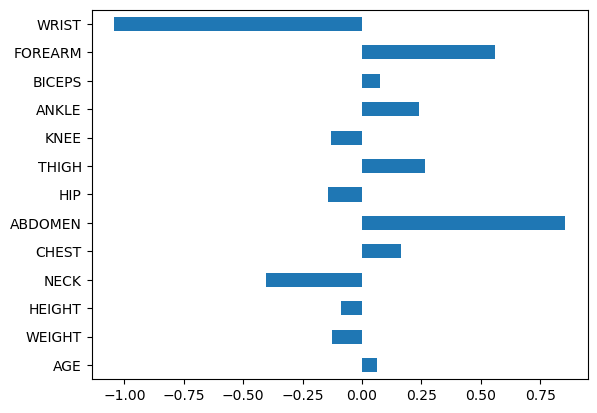

In [117]:
df_ridge_coef.plot.barh(y = 'Coef', legend = False)

In [120]:
# 모델의 성능(Ridge)
# alpha : 규제화 강도
train_pred = ridge.predict(df_train_x)
test_pred = ridge.predict(df_test_x)

print("train data의 결정계수:", r2_score(df_train_y, train_pred))
print("test data의 결정계수:", r2_score(df_test_y, test_pred))

train data의 결정계수: 0.7688327524317085
test data의 결정계수: 0.6641643344921555


### 모델 생성(LASSO)

In [121]:
# 모델 생성
lasso = Lasso(random_state = 1234, alpha = 1)
lasso.fit(df_train_x, df_train_y)
# 절편값 확인
print(lasso.intercept_)
# 회귀계수 확인
df_lasso_coef = pd.DataFrame({"Coef":ridge.coef_}, index = df_train_x.columns)
df_lasso_coef

-39.35090439476542


,Coef
AGE,0.064806
WEIGHT,-0.128253
HEIGHT,-0.088214
NECK,-0.406260
CHEST,0.162899
ABDOMEN,0.854771
HIP,-0.143884
THIGH,0.263334
KNEE,-0.132273
ANKLE,0.240906


<AxesSubplot:>

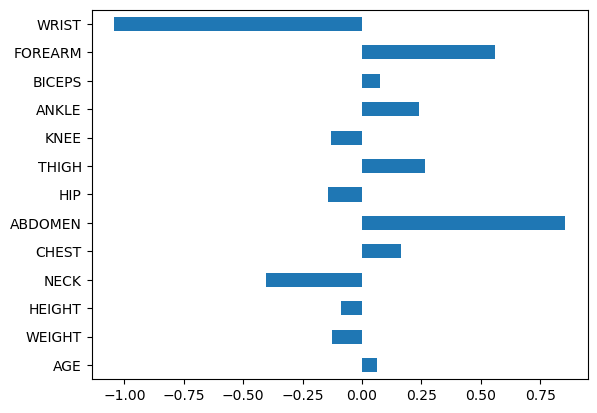

In [122]:
df_lasso_coef.plot.barh(y = 'Coef', legend = False)

In [123]:
# 모델의 성능
# alpha : 규제화 강도
train_pred = lasso.predict(df_train_x)
test_pred = lasso.predict(df_test_x)

print("train data의 결정계수:", r2_score(df_train_y, train_pred))
print("test data의 결정계수:", r2_score(df_test_y, test_pred))

train data의 결정계수: 0.7448823019911712
test data의 결정계수: 0.6397843604404867


### 모델생성(ElasticNet)

In [124]:
# 모델 생성
elastic = ElasticNet(random_state = 1234, alpha = 1)
elastic.fit(df_train_x, df_train_y)
# 절편값 확인
print(elastic.intercept_)
# 회귀계수 확인
df_elastic_coef = pd.DataFrame({"Coef":ridge.coef_}, index = df_train_x.columns)
df_elastic_coef

-47.00875497399707


,Coef
AGE,0.064806
WEIGHT,-0.128253
HEIGHT,-0.088214
NECK,-0.406260
CHEST,0.162899
ABDOMEN,0.854771
HIP,-0.143884
THIGH,0.263334
KNEE,-0.132273
ANKLE,0.240906


<AxesSubplot:>

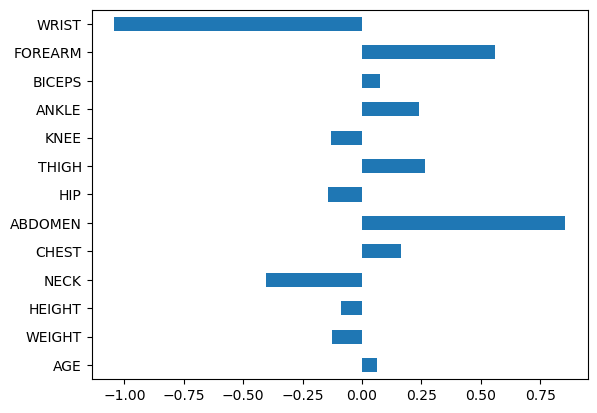

In [125]:
df_elastic_coef.plot.barh(y = 'Coef', legend = False)

In [126]:
# 모델의 성능
# alpha : 규제화 강도
train_pred = elastic.predict(df_train_x)
test_pred = elastic.predict(df_test_x)

print("train data의 결정계수:", r2_score(df_train_y, train_pred))
print("test data의 결정계수:", r2_score(df_test_y, test_pred))

train data의 결정계수: 0.7549442655494084
test data의 결정계수: 0.636671178295827
